# Long Short Term Memory (LSTM) deep learning model for time series prediction

In [1]:
import pandas as pd
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

**Importing 'LSTM' class**

In [2]:
from script.deep_learning import LSTM

**Instantiate the the class**

In [3]:
modelling=LSTM()

**Loading the csv data to a pandas dataframe**

In [4]:
train_df=pd.read_csv("data\\train.csv",low_memory=False)

In [5]:
train_df=train_df.drop(train_df.index[100000:])

### **Isolate Time Series Data:**
Extract relevant columns (e.g., Date, Sales) and structure the data in a time series format.

In [6]:
time_series_data = modelling.isolate_time_series(train_df)

2024-09-24 14:31:14,677 - INFO - isolate time series data


### **Check for Stationarity:** 
Use statistical tests like the Augmented Dickey-Fuller (ADF) test to assess whether the time series data is stationary.

In [7]:
modelling.check_stationarity(time_series_data['Sales'])

2024-09-24 14:31:14,710 - INFO - check if it is stationary or not


ADF Statistic: -7.16288659108145
p-value: 2.9367849768129704e-10
The time series is stationary.


### **Check for Autocorrelation:** 
Plot autocorrelation (ACF) and partial autocorrelation (PACF) to understand lag dependencies in the data.

2024-09-24 14:31:47,322 - INFO - plot ACF and PACF


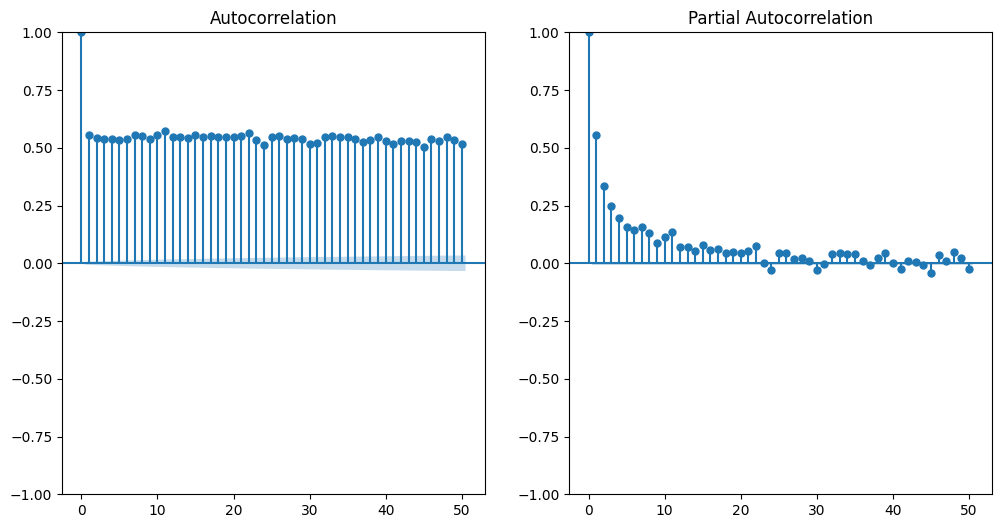

In [8]:
modelling.plot_correlation(time_series_data)

### **Supervised Learning Data:** 
Convert the time series data into a supervised learning problem using a sliding window.

In [9]:
supervised_data = modelling.create_supervised_data(time_series_data['Sales'], window_size=3)

2024-09-24 14:31:58,317 - INFO - Convert the time series data into a supervised learning


### **Scale the Data:**
Scale the features into the range (-1, 1) using MinMaxScaler.

In [10]:
scaled_data, scaler = modelling.scale_data(supervised_data)

2024-09-24 14:31:58,367 - INFO - scale the features


### **Build the LSTM Model:** 
Use TensorFlow/Keras to build and train an LSTM model.

In [11]:
# Prepare the data
X, y = modelling.prepare_data_for_lstm(scaled_data, window_size=3)
X_feature_matrix=X
# Reshape X for LSTM input: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

input_shape = (X.shape[1], X.shape[2])

lstm_model = modelling.build_lstm_model(input_shape)

# Train the LSTM model
lstm_model.fit(X, y, epochs=20, batch_size=32, verbose=1)

2024-09-24 14:31:58,413 - INFO - prepare data for LSTM


Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0367
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0176
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0175
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0175
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0176
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0176
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0174
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0177
Epoch 9/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0171
Epoch 10/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0173
Epoch 11/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0170
Epoch 12/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0170
Epoch 13/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0174
Epoch 14/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0170
Epoch 15/20
3125/3125 ━━━━━━

### **Evaluate the Model:**
Measure the model’s performance using metrics like mean squared error (MSE).

In [14]:
modelling.evaluate_model(X_feature_matrix,y,lstm_model)

2024-09-24 14:35:25,221 - INFO - evaluate the model


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Mean Squared Error: 0.016765158579181063
Mean Absolute Error: 0.016765158579181063
R^2 Score: 0.5171189146931738


### Serialize and save model
To serialize and save models with a timestamp, we can use the Python pickle library to save the model, and the datetime module to generate the required timestamp format (e.g., 10-08-2020-16-32-31-00.pkl).

In [13]:
modelling.save_model_with_timestamp(lstm_model,'LSTM_model')

2024-09-24 14:34:26,263 - INFO - Serializes and saves a trained model with a timestamp.


Model saved as models/LSTM_model-24-09-2024-14-34-26-00.pkl


'models/LSTM_model-24-09-2024-14-34-26-00.pkl'